In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/home/salini/Downloads/CHRISTY/titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [7]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])

In [8]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [10]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
X=data.drop(['PassengerId','Cabin','Name','Ticket','Survived'],axis=1)

In [12]:
y=data['Survived']

In [13]:
numcols=data.dtypes[(data.dtypes=='int64')|(data.dtypes=='float64')].index
numcols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

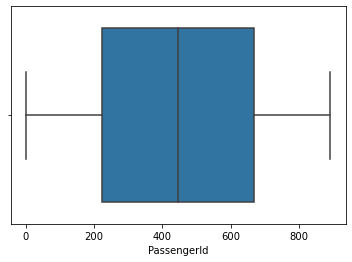

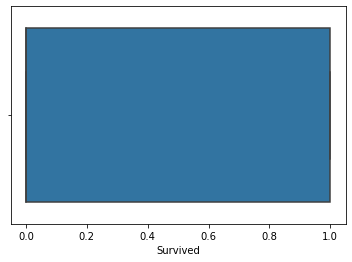

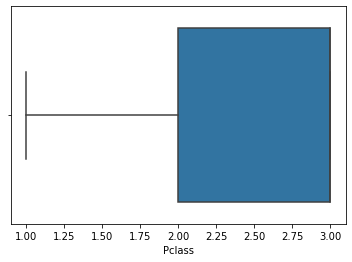

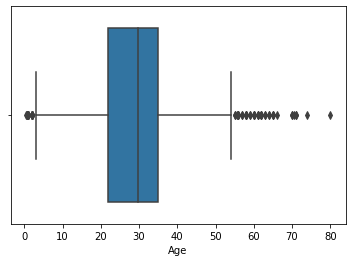

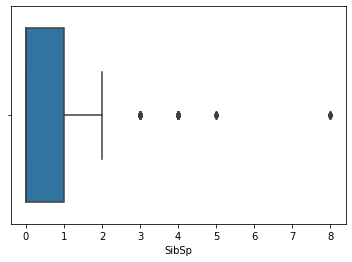

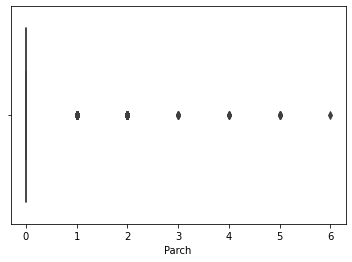

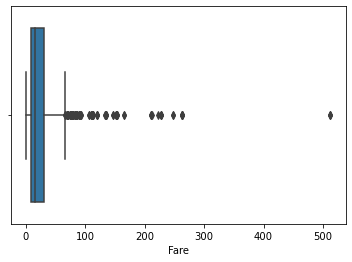

In [14]:
for x in numcols:
    sns.boxplot(data[x])
    plt.show()

In [15]:
for x in numcols:
    descr=data[x].describe()
    IQR=descr['75%']-descr['25%']
    upper_limit=descr['75%']+1.5*IQR
    lower_limit=descr['25%']-1.5*IQR
    data[x][data[x]>upper_limit]=upper_limit
    data[x][data[x]<lower_limit]=lower_limit

<ipython-input-15-9ab08303e841>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit]=upper_limit
<ipython-input-15-9ab08303e841>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]<lower_limit]=lower_limit
<ipython-input-15-9ab08303e841>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit]=upper_limit
<ipython-input-15-9ab08303e841>:7: SettingWithCopyWarning: 
A value is tr

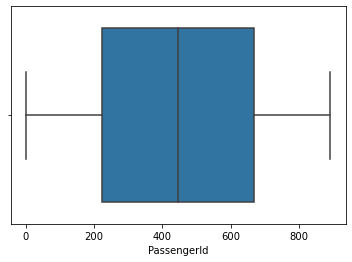

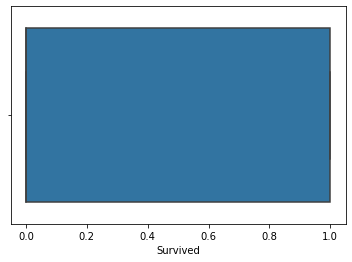

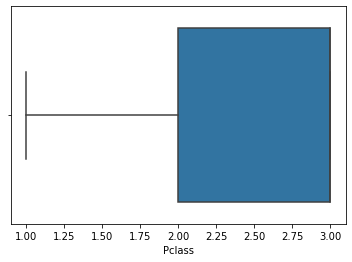

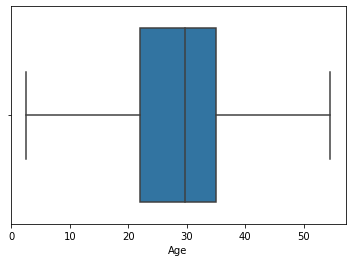

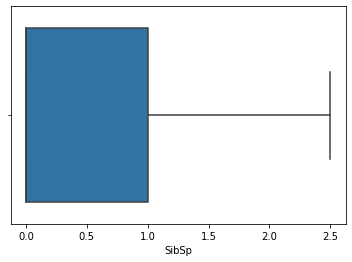

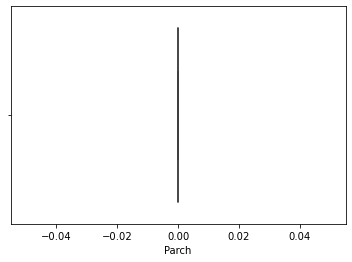

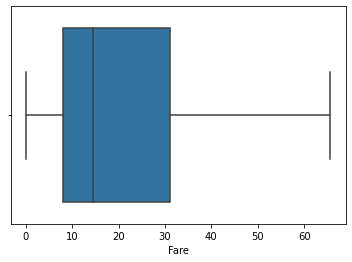

In [16]:
for x in numcols:
    sns.boxplot(data[x])
    plt.show()

In [17]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [18]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [19]:
X['Sex']=pd.get_dummies(data.Sex,prefix='Sex')
X['Embarked']=pd.get_dummies(data.Embarked,prefix='Embarked')

In [20]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,random_state=50) 

In [22]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
100,3,1,28.0,0,0,7.8958,0
660,1,0,50.0,2,0,133.6500,0
353,3,0,25.0,1,0,17.8000,0
540,1,1,36.0,0,2,71.0000,0
195,1,1,58.0,0,0,146.5208,1


In [23]:
y_train.head()

100    0
660    1
353    0
540    1
195    1
Name: Survived, dtype: int64

In [24]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
558,1,1,39.000000,1,1,79.6500,0
547,2,0,29.699118,0,0,13.8625,1
494,3,0,21.000000,0,0,8.0500,0
679,1,0,36.000000,0,1,512.3292,1
7,3,0,2.000000,3,1,21.0750,0


In [25]:
y_test.head()

558    1
547    1
494    0
679    1
7      0
Name: Survived, dtype: int64

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()

In [27]:
cls

RandomForestClassifier()

In [28]:
n_estimator=[25,50,75,100]#no: of trees in the forest,default=100
criterion=['entropy']#criteria for chosing nodes default='gini'
max_depth=[3,5,10]#max number of nodes in a tree default=None(it will go till all possible nodes)
parameter={'n_estimators':n_estimator,'criterion':criterion,'max_depth':max_depth}#this will undergo 4*1*3=12 iterations
RFC_cls=GridSearchCV(cls,parameter)
RFC_cls.fit(X_train,y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100]})

In [29]:
n_estimator

[25, 50, 75, 100]

In [30]:
RFC_cls.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 25}

In [31]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=25,criterion='gini',max_depth=5)


In [32]:
cls.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=25)

In [33]:
y_pred=cls.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0])

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test,y_pred)

array([[168,  11],
       [ 50,  66]])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7932203389830509

In [37]:
#END